In [1]:
# Import Bibleoteques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import klib
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import data
dataset = pd.read_csv("advertising.csv")

In [3]:
# afficher le 5 premiere enregistrements pour comprendre le data
dataset.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [4]:
# display shape
dataset.shape

(200, 4)

In [5]:
# display types columns
dataset.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
# display columns
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# display data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# display descriptive statistics of numeric data columns 
dataset.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [9]:
# display descriptive statistics of all data columns
dataset.describe(include='all')

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [10]:
# number of null values ​​per column
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

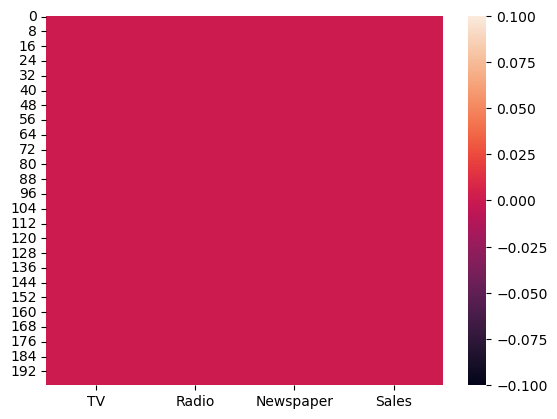

In [11]:
# schema consult the number of null values ​​per column
sns.heatmap(dataset.isnull())

In [12]:
# duplicate columns
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [13]:
dataset.duplicated().sum()

0

<Axes: >

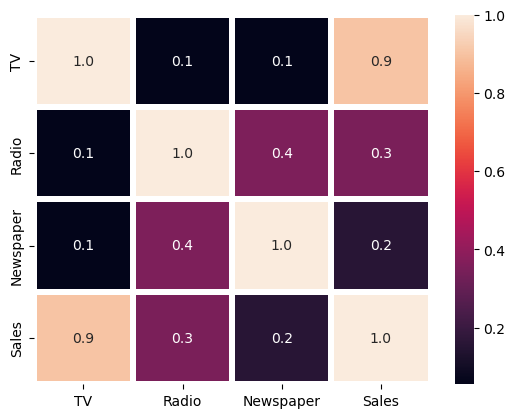

In [14]:
# graphical representation of data where individual values
num_cols = dataset.select_dtypes(include='number').columns

corr_matrix = dataset[num_cols].corr()
corr_matrix

sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidths=4)

In [15]:
#Handle outliers
numeric_columns = dataset.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = dataset.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

dataset = cleaned_dataset

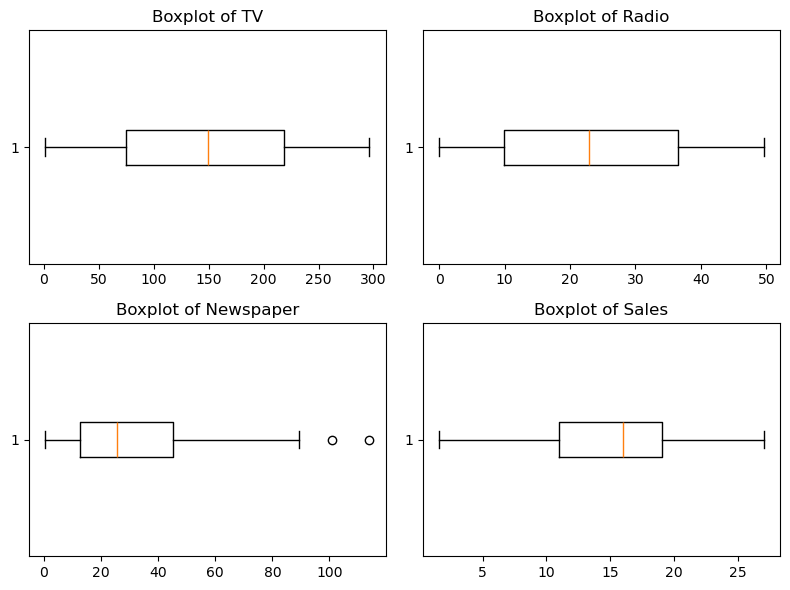

In [16]:
#Boxplots
plt.figure(figsize=(8, 6))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot((len(numeric_columns.columns) + 1) // 2, 2, i + 1)
    plt.boxplot(numeric_columns[column], vert=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [17]:
# background_gradient
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

<Axes: title={'center': 'Feature-correlation (pearson)'}>

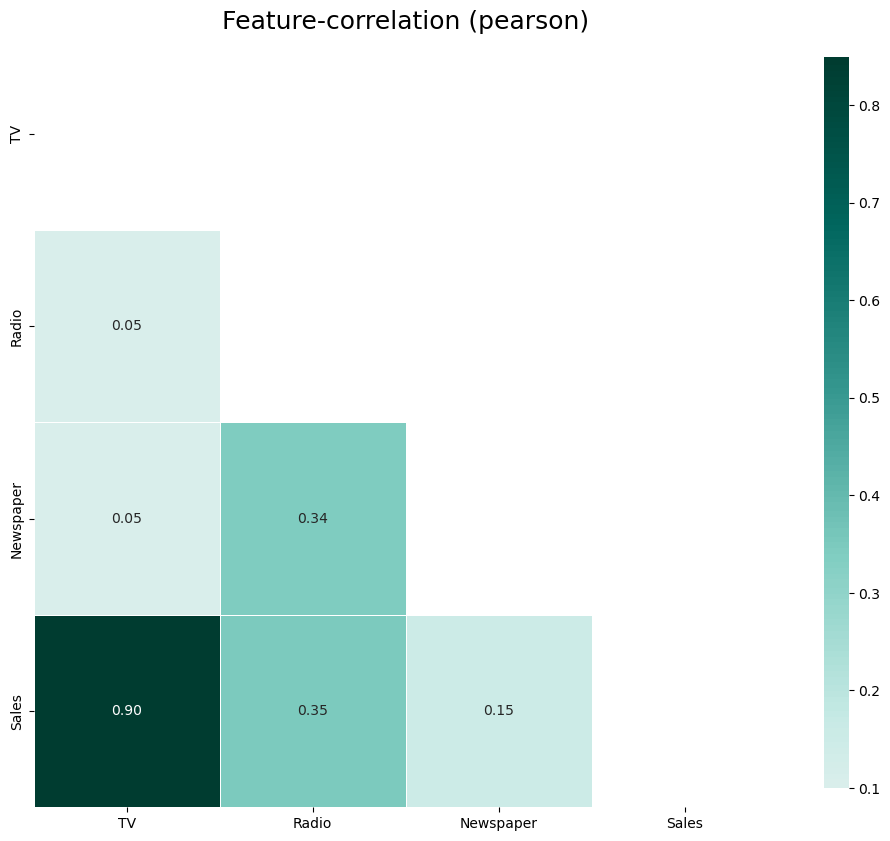

In [18]:
# Correlation heatmap using KLIB
klib.corr_plot(dataset)

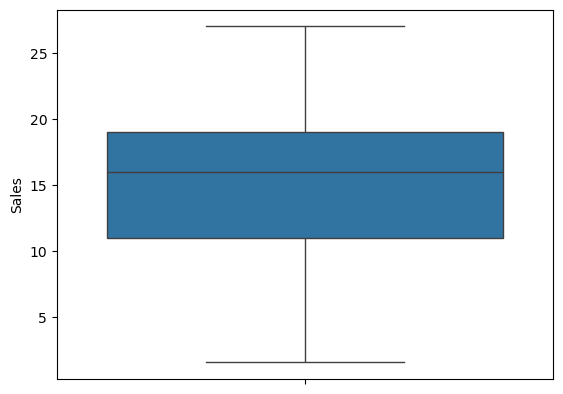

In [19]:
# Sales (Target Variable)
sns.boxplot(dataset['Sales'])
plt.show()

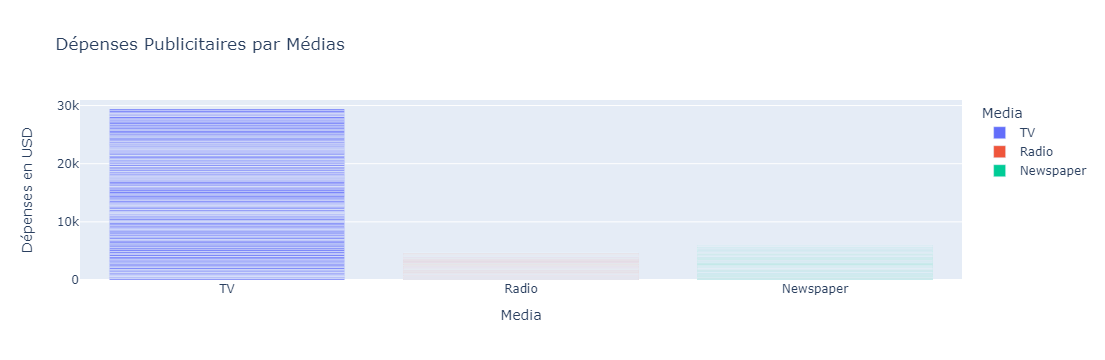

In [20]:
# TV, Radio and Newspaper viewing
#Create a long DataFrame for easy visualization
dataset_long = dataset.iloc[ : , : -1].melt(var_name='Media', value_name='Spendings', id_vars=None)
dataset_long
# Create a bar chart
fig = px.bar(dataset_long, x='Media', y='Spendings', color='Media',   
             title='Dépenses Publicitaires par Médias',  
             labels={'Spendings': 'Dépenses en USD'})  

# Afficher le graphique  
fig.show()  

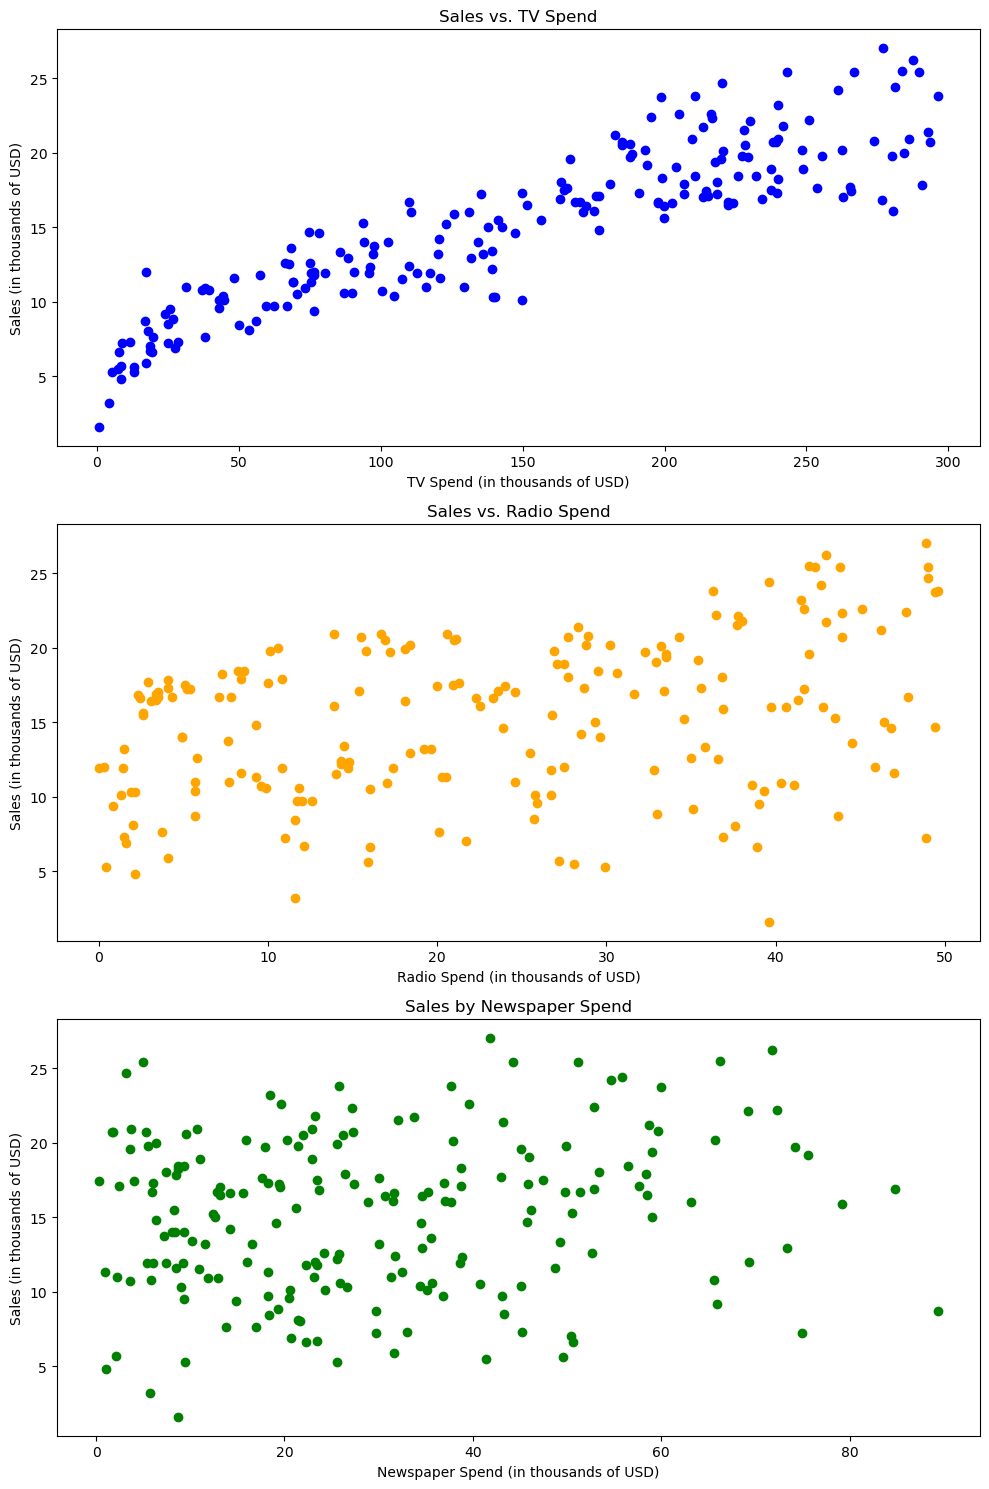

In [21]:
# visualize the evolution of sales based on advertising expenditure in TV and Radio media
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# TV graph
axs[0].scatter(dataset['TV'], dataset['Sales'], color='blue')
axs[0].set_title('Sales vs. TV Spend')
axs[0].set_xlabel('TV Spend (in thousands of USD)')
axs[0].set_ylabel('Sales (in thousands of USD)')

# Radio graph
axs[1].scatter(dataset['Radio'], dataset['Sales'], color='orange')
axs[1].set_title('Sales vs. Radio Spend')
axs[1].set_xlabel('Radio Spend (in thousands of USD)')
axs[1].set_ylabel('Sales (in thousands of USD)')

# Graph for Newspaper
axs[2].scatter(dataset['Newspaper'], dataset['Sales'], color='green')
axs[2].set_title('Sales by Newspaper Spend')
axs[2].set_xlabel('Newspaper Spend (in thousands of USD)')
axs[2].set_ylabel('Sales (in thousands of USD)')

# Adjust spacing between sub-graphs
plt.tight_layout()

# Show the graph
plt.show()

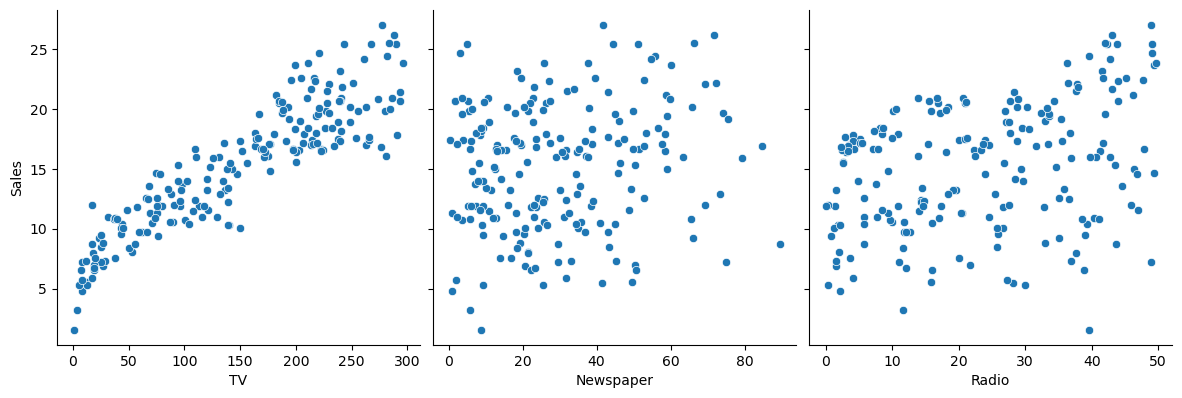

In [22]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [23]:
# Separate the features and the target variable
X = dataset.iloc[ : , :-1]
y = dataset.iloc[ : , -1]

In [24]:
X

TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [25]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [26]:
# Split the dataset (80% training and 20% testing)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [27]:
X_train

TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]

In [28]:
X_test

TV  Radio  Newspaper
95   163.3   31.6      52.90
15   195.4   47.7      52.90
30   292.9   28.3      43.20
158   11.7   36.9      45.20
128  220.3   49.0       3.20
115   75.1   35.0      52.70
69   216.8   43.9      27.20
170   50.0   11.6      18.40
174  222.4    3.4      13.10
45   175.1   22.5      31.50
66    31.5   24.6       2.20
182   56.2    5.7      29.70
165  234.5    3.4      84.80
78     5.4   29.9       9.40
186  139.5    2.1      26.60
177  170.2    7.8      35.20
56     7.3   28.1      41.40
152  197.6   23.3      14.20
82    75.3   20.3      32.50
68   237.4   27.5      11.00
124  229.5   32.3      74.20
16    67.8   36.6      25.75
148   38.0   40.3      11.90
93   250.9   36.5      72.30
65    69.0    9.3       0.90
60    53.5    2.0      21.40
84   213.5   43.0      33.80
67   139.3   14.5      10.20
125   87.2   11.8      25.90
132    8.4   27.2       2.10
9    199.8    2.6      21.20
18    69.2   20.5      18.30
55   198.9   49.4      60.00
75    16.9   43.7      89.40
150  280.7   13.9      37.00
104  238.2   34.3       5.30
135   48.3   47.0       8.50
137  273.7   28.9      59.70
164  117.2   14.7       5.40
76    27.5    1.6      20.70

In [29]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [30]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [31]:
# Standardize features 
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [32]:
# create model LinearRegression
regressor = LinearRegression()

In [33]:
# train the model LinearRegression
lr = regressor.fit(X_train_scaled, y_train)

In [34]:
# Print the intercept and coefficients  
print(f'Intercept: {regressor.intercept_}')  

coefficients = regressor.coef_  
for feature, coeff in zip(['TV', 'Radio', 'Newspaper'], coefficients):  
    print(f'Coefficient for {feature}: {coeff}') 

Intercept: 15.330625000000003
Coefficient for TV: 4.592032535329047
Coefficient for Radio: 1.4791870632507464
Coefficient for Newspaper: 0.11653136289516926


In [35]:
# Make predictions  
y_pred = regressor.predict(X_test_scaled)

In [36]:
# Evaluate the model  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f'Mean Squared Error: {mse}')  
print(f'R-squared: {r2}') 

Mean Squared Error: 2.9397473693722604
R-squared: 0.9048659313302031


In [37]:
# SLR coefficient
# If you want to print a specific coefficient, e.g., for TV (first feature)  
a_tv = regressor.coef_[0]  
a_Radio = regressor.coef_[1]
a_Newspaper = regressor.coef_[2]
print("Coefficient for TV (a) =", a_tv)    
print("Coefficient for Radio (a) =", a_Radio) 
print("Coefficient for Newspaper (a) =", a_Newspaper) 

Coefficient for TV (a) = 4.592032535329047
Coefficient for Radio (a) = 1.4791870632507464
Coefficient for Newspaper (a) = 0.11653136289516926


In [38]:
# The ordinate at the origin
# Print the intercept (ordinate at the origin)  
intercept = regressor.intercept_  
print("Ordinate at the origin (Intercept) =", intercept)  

# Print coefficients for each feature  
print("Coefficients:")  
for feature, coefficient in zip(['TV', 'Radio', 'Newspaper'], regressor.coef_):  
    print(f"Coefficient for {feature}: {coefficient}")  

Ordinate at the origin (Intercept) = 15.330625000000003
Coefficients:
Coefficient for TV: 4.592032535329047
Coefficient for Radio: 1.4791870632507464
Coefficient for Newspaper: 0.11653136289516926


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



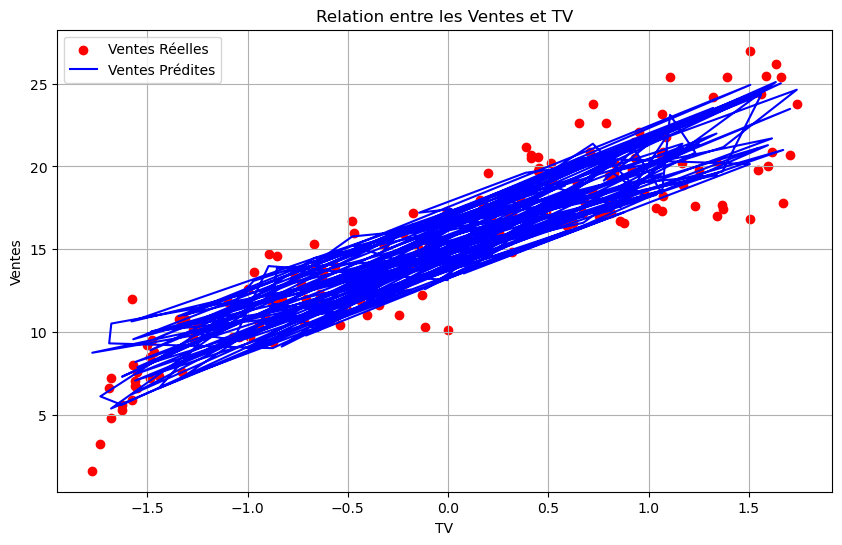

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



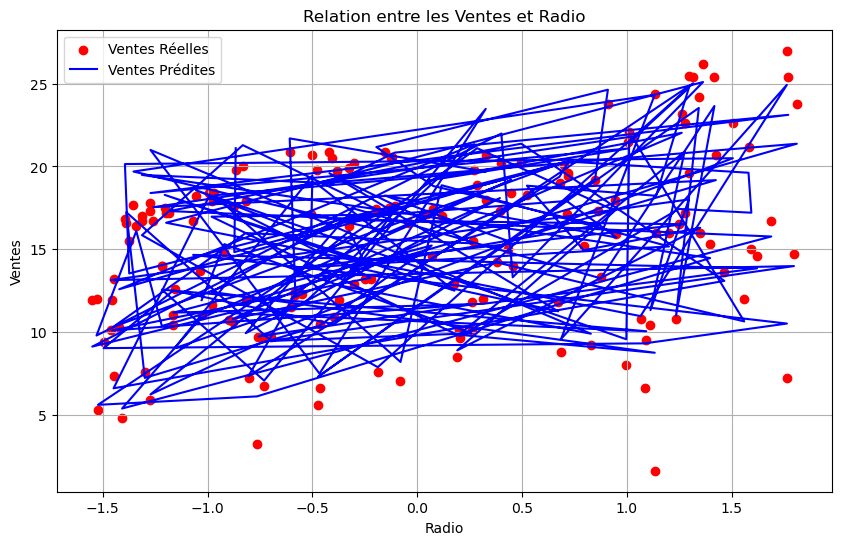

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



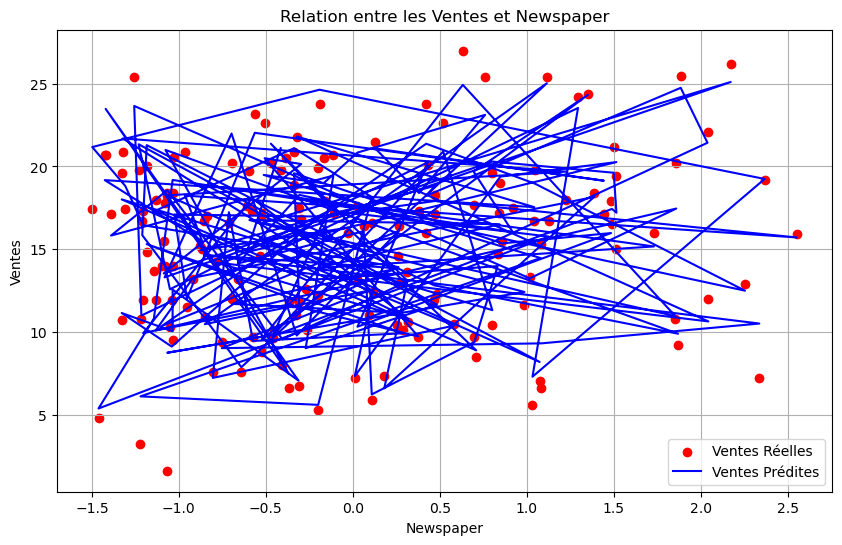

In [39]:
# Plotting Charts for TV, Radio and Newspaper
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
# Liste des caractéristiques pour les graphiques  
features = ['TV', 'Radio', 'Newspaper']  

# Tracer les graphiques  
for feature in features:  
    plt.figure(figsize=(10, 6))  
    
    # Utilisation de y_train directement pour les valeurs réelles  
    plt.scatter(X_train_scaled[feature], y_train, color='red', label='Ventes Réelles')  
    
    # Prédictions pour la ligne de régression  
    plt.plot(X_train_scaled[feature], regressor.predict(X_train_scaled), color='blue', label='Ventes Prédites')  
    
    plt.title(f'Relation entre les Ventes et {feature}')  
    plt.xlabel(feature)  
    plt.ylabel('Ventes')  
    plt.legend()  
    plt.grid()  
    plt.show()   

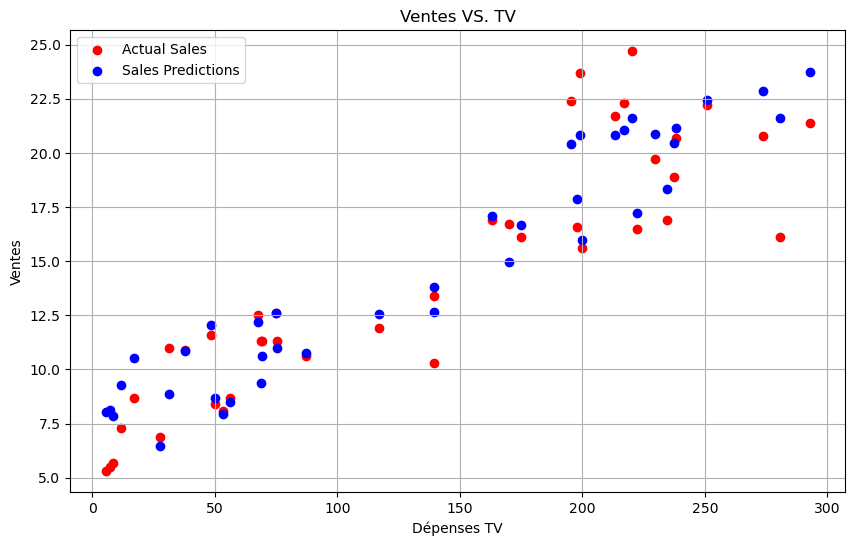

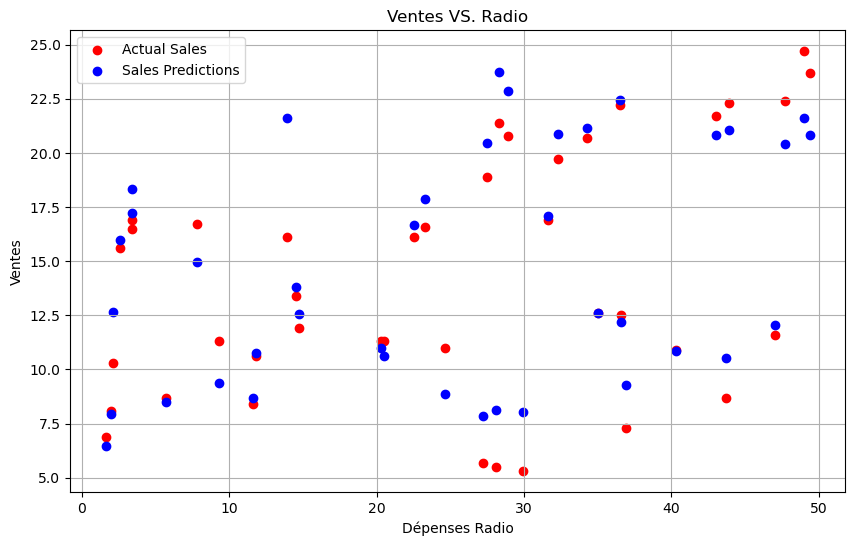

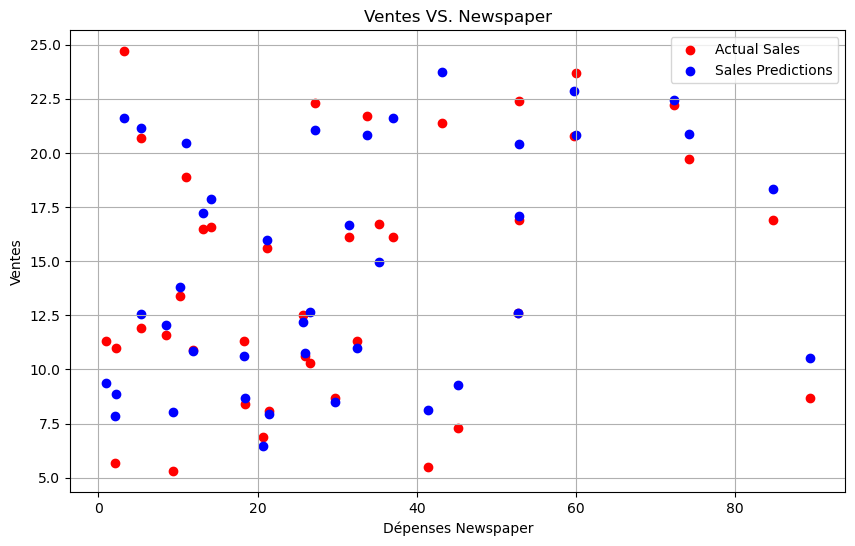

In [40]:
# Plotting Charts scatter for TV, Radio and Newspaper
# Trace for TV  
plt.figure(figsize=(10, 6))  
plt.scatter(X_test['TV'], y_test, color='red', label='Actual Sales')  # Graphique de dispersion des vraies ventes  
plt.scatter(X_test['TV'], y_pred, color='blue', label='Sales Predictions')  # Points prédites  
plt.title('Ventes VS. TV')  
plt.xlabel('Dépenses TV')  
plt.ylabel('Ventes')  
plt.legend()  
plt.grid()  
plt.show()  

# Trace for Radio  
plt.figure(figsize=(10, 6))  
plt.scatter(X_test['Radio'], y_test, color='red', label='Actual Sales')  # Graphique de dispersion des vraies ventes  
plt.scatter(X_test['Radio'], y_pred, color='blue', label='Sales Predictions')  # Points prédites  
plt.title('Ventes VS. Radio')  
plt.xlabel('Dépenses Radio')  
plt.ylabel('Ventes')  
plt.legend()  
plt.grid()  
plt.show()  

# Trace for Newspaper  
plt.figure(figsize=(10, 6))  
plt.scatter(X_test['Newspaper'], y_test, color='red', label='Actual Sales')  # Graphique de dispersion des vraies ventes  
plt.scatter(X_test['Newspaper'], y_pred, color='blue', label='Sales Predictions')  # Points prédites  
plt.title('Ventes VS. Newspaper')  
plt.xlabel('Dépenses Newspaper')  
plt.ylabel('Ventes')  
plt.legend()  
plt.grid()  
plt.show()  

In [41]:
# mean square error (mse)
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import math
mse = math.sqrt(mean_squared_error(y_test, y_pred))
mse

1.714569149778527

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.2873891158610444